# Is there an association between the most deprived areas and reoffending rates?

### Importing the packages and loading the data

In [1]:
#importing packages

#for visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# for data manipulation
import pandas as pd
import numpy as np
import geopandas as gpd

#for statistical modelling

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import qqplot
import contextily as ctx
from shapely.geometry import Point
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
import warnings
warnings.filterwarnings('ignore')

Loaded below are the three datasets used in this project. The crime dataset has reoffending information (non-spatial) (Ministry of Justice [MoJ], 2022). The deprivation dataset includes Index of Multiple Deprivation score (spatial) (Department for Levelling Up, Housing and Communities [DLUHC], 2020). Finally, the regions dataset has the geographical data points of the regions stated in the crime dataset (spatial) (Office for National Statistics [ONS], 2020).

In [3]:
#loading the reoffending dataset
crime = pd.read_csv("/Users/jadeparker/Documents/PhD_GEOG5995/GEOG5995-main/Data for Final Project/English IMD 2019/NEW CRIME DATA GEOG.csv")

In [4]:
#loading the deprivation dataset
shapefile_path = '/Users/jadeparker/Documents/PhD_GEOG5995/GEOG5995-main/Data for Final Project/English IMD 2019/IMD_2019.shp'

dep = gpd.read_file(shapefile_path)

In [5]:
#loading the regional dataset
shapefile_path = '/Users/jadeparker/Downloads/infuse_rgn_2011_clipped/infuse_rgn_2011_clipped.shp'

regions = gpd.read_file(shapefile_path)

## Data cleaning and visualisation (reoffending)

In [6]:
#exploring the data
crime.head()

,adult_juv,cohort,region,category,subcat1,subcat2,offenders,reoffenders,reoffences
0,Adult,Apr 2008 to Mar 2009,East Midlands,Age total,18 to 20,-,9105,3110,9049
1,Adult,Apr 2008 to Mar 2009,East Midlands,Age total,21 to 24,-,9470,2953,8947
2,Adult,Apr 2008 to Mar 2009,East Midlands,Age total,25 to 29,-,9011,2868,9655
3,Adult,Apr 2008 to Mar 2009,East Midlands,Age total,30 to 34,-,6334,1965,6470
4,Adult,Apr 2008 to Mar 2009,East Midlands,Age total,35 to 39,-,5574,1423,4333


The dataset 'crime1' is created below, so the original dataset 'crime' has all the variables for later regression modelling.

In [7]:
#getting rid of the juvenile cases, just basing this research on adults
crime1 = crime[crime['adult_juv'] != 'Juvenile']

#simplying the dataset by dropping unnecessary variables
crime1 = crime1.drop(columns=['category', 'subcat2'])

#checking this worked
crime1.head()

,adult_juv,cohort,region,subcat1,offenders,reoffenders,reoffences
0,Adult,Apr 2008 to Mar 2009,East Midlands,18 to 20,9105,3110,9049
1,Adult,Apr 2008 to Mar 2009,East Midlands,21 to 24,9470,2953,8947
2,Adult,Apr 2008 to Mar 2009,East Midlands,25 to 29,9011,2868,9655
3,Adult,Apr 2008 to Mar 2009,East Midlands,30 to 34,6334,1965,6470
4,Adult,Apr 2008 to Mar 2009,East Midlands,35 to 39,5574,1423,4333


In [8]:
#grouping by age
crime1_bar1 = crime1.groupby('subcat1').sum().reset_index()

#checking the above code worked as expected
crime1_bar1.head()

,subcat1,offenders,reoffenders,reoffences
0,18 to 20,771576,258122,791540
1,21 to 24,994696,299625,945107
2,25 to 29,1055771,320668,1153695
3,30 to 34,842918,268084,1064016
4,35 to 39,682282,212253,829996


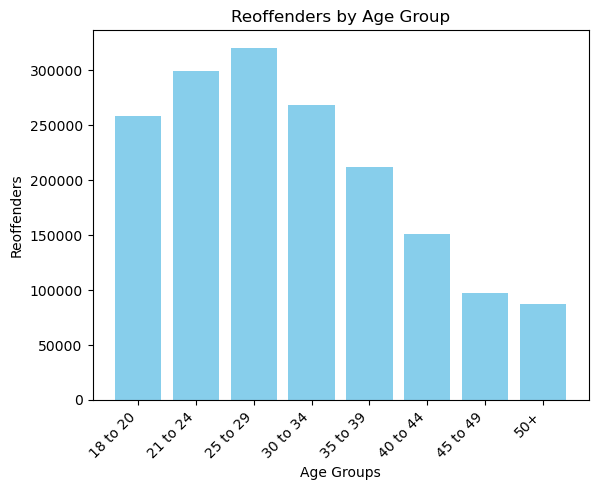

In [9]:
#bar chart showing amount of reoffenders by age
age = crime1_bar1['subcat1']
reoffenders = crime1_bar1['reoffenders']

plt.bar(age, reoffenders, color='skyblue')
plt.xlabel('Age Groups')
plt.ylabel('Reoffenders')
plt.title('Reoffenders by Age Group')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

A bar chart is used here to see the distribution of reoffenders by age group, to better understand and easily interpret the data.

In [10]:
#finding the reoffending rate in a percentage
crime1_bar1['reoffending_percentage'] = (crime1_bar1['reoffenders'] / crime1_bar1['offenders']) * 100

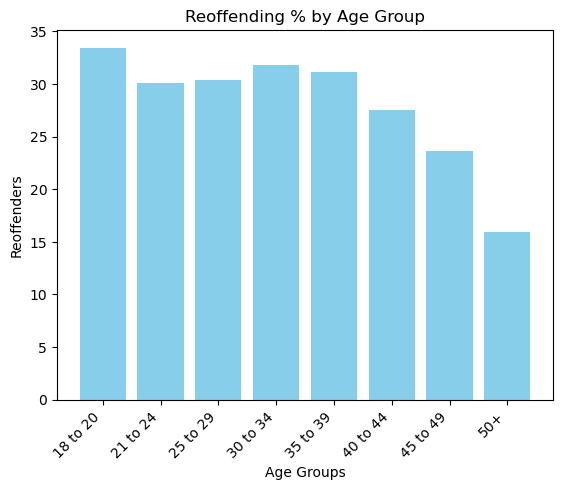

In [11]:
#bar chart of reoffending rate by age
age = crime1_bar1['subcat1']
reoffenders = crime1_bar1['reoffending_percentage']

plt.bar(age, reoffenders, color='skyblue')
plt.xlabel('Age Groups')
plt.ylabel('Reoffenders')
plt.title('Reoffending % by Age Group')
plt.xticks(rotation=45, ha='right') 
plt.show()

By finding out the reoffending rate as a percentage, it more accurately shows us the proportion of reoffenders in each age group. The first bar chart, which represented the sum of the reoffenders in each group, misleadingly shows (though accurate numerically) the '25 to 29' category to be the age group who reoffend the most. However, after calculating the proportion of offenders that go on to reoffend, it is actually those who are '18 to 20' which are most likely to reoffend.

In [12]:
#grouping by cohort
crime1_bar2 = crime1.groupby('cohort').sum().reset_index()

In [13]:
#checking the above code worked as expected
crime1_bar2.head()

,cohort,offenders,reoffenders,reoffences
0,Apr 2008 to Mar 2009,634048,190153,618550
1,Apr 2009 to Mar 2010,612745,179381,569933
2,Apr 2010 to Mar 2011,597627,178267,584383
3,Apr 2011 to Mar 2012,574399,171752,570371
4,Apr 2012 to Mar 2013,527444,156291,541898


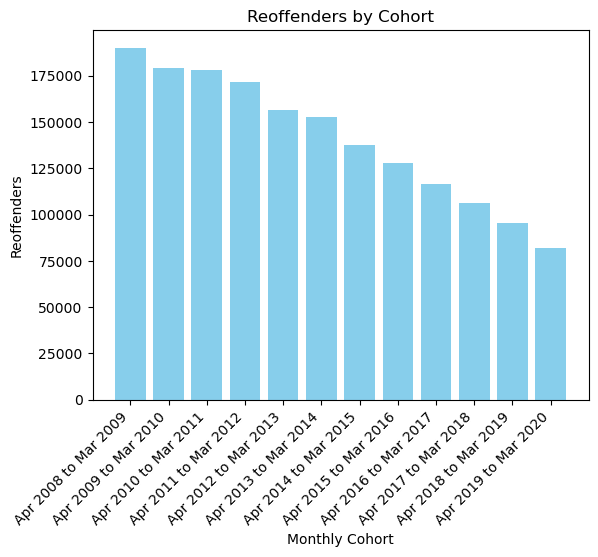

In [14]:
#bar chart of amount of reoffenders by 3 monthly cohort
age = crime1_bar2['cohort']
reoffenders = crime1_bar2['reoffenders']

plt.bar(age, reoffenders, color='skyblue')
plt.xlabel('Monthly Cohort')
plt.ylabel('Reoffenders')
plt.title('Reoffenders by Cohort')
plt.xticks(rotation=45, ha='right') 
plt.show()

Using a bar chart to explore the dataset again, instead looking at the amount of reoffenders in each yearly cohort.

In [15]:
#calculating reoffending rate
crime1_bar2['reoffending_percentage'] = (crime1_bar2['reoffenders'] / crime1_bar2['offenders']) * 100

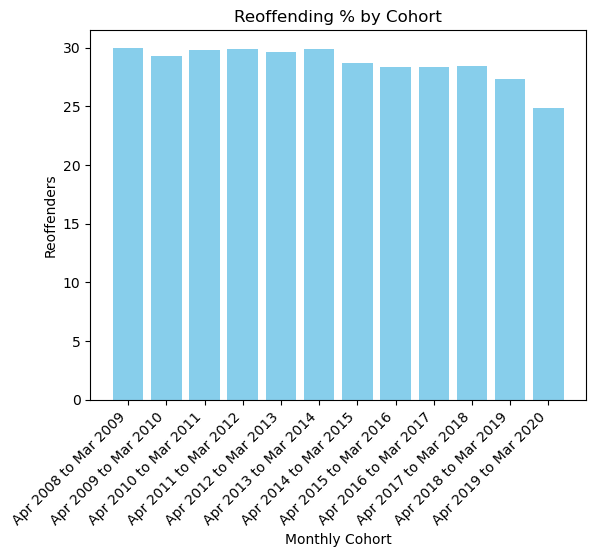

In [16]:
#bar chart of reoffending rate by 3 monthly cohort
age = crime1_bar2['cohort']
reoffenders = crime1_bar2['reoffending_percentage']

plt.bar(age, reoffenders, color='skyblue')
plt.xlabel('Monthly Cohort')
plt.ylabel('Reoffenders')
plt.title('Reoffending % by Cohort')
plt.xticks(rotation=45, ha='right')
plt.show()

As mentioned above, the raw counts of reoffending, as opposed to the percentage of offenders who reoffend, can be misinterpreted (Office for Statistics Regulation, 2021). Therefore, the above bar chart helps better visualise the data. The first bar chart of the sum of reoffenders appears to show that reoffending has dramatically decreased over the years. The reoffending rate, however, has remained more stable (as shown in the above bar chart). 

## Chloropleth maps for reoffending

In [17]:
#quick exploration of the deprivation data
dep.head()

dep.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 32844 entries, 0 to 32843
Data columns (total 64 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   lsoa11cd    32844 non-null  object  
 1   lsoa11nm    32844 non-null  object  
 2   lsoa11nmw   32844 non-null  object  
 3   st_areasha  32844 non-null  float64 
 4   st_lengths  32844 non-null  float64 
 5   IMD_Rank    32844 non-null  int64   
 6   IMD_Decile  32844 non-null  int64   
 7   LSOA01NM    32844 non-null  object  
 8   LADcd       32844 non-null  object  
 9   LADnm       32844 non-null  object  
 10  IMDScore    32844 non-null  float64 
 11  IMDRank0    32844 non-null  int64   
 12  IMDDec0     32844 non-null  int64   
 13  IncScore    32844 non-null  float64 
 14  IncRank     32844 non-null  int64   
 15  IncDec      32844 non-null  int64   
 16  EmpScore    32844 non-null  float64 
 17  EmpRank     32844 non-null  int64   
 18  EmpDec      32844 non-null  int64   
 

In [18]:
#dropping all unneccessary columns
dep = dep[['lsoa11cd', 'geometry', 'IMDScore', 'IMD_Decile', 'WorkPop']]

#verifying the result
print(dep.head())

    lsoa11cd                                           geometry  IMDScore  \
0  E01000001  POLYGON ((532105.092 182011.230, 532162.491 18...     6.208   
1  E01000002  POLYGON ((532746.813 181786.891, 532671.688 18...     5.143   
2  E01000003  POLYGON ((532135.145 182198.119, 532158.250 18...    19.402   
3  E01000005  POLYGON ((533807.946 180767.770, 533649.063 18...    28.652   
4  E01000006  POLYGON ((545122.049 184314.931, 545271.917 18...    19.837   

   IMD_Decile  WorkPop  
0           9   715.00  
1          10   619.75  
2           5   804.00  
3           3   683.00  
4           5  1284.50  


In [19]:
#renaming the column
dep = dep.rename(columns={'geometry': 'dep_geom'})

In [20]:
#checking the above code worked
dep.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 32844 entries, 0 to 32843
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   lsoa11cd    32844 non-null  object  
 1   dep_geom    32844 non-null  geometry
 2   IMDScore    32844 non-null  float64 
 3   IMD_Decile  32844 non-null  int64   
 4   WorkPop     32844 non-null  float64 
dtypes: float64(2), geometry(1), int64(1), object(1)
memory usage: 1.3+ MB


In [21]:
#exploring the crime dataset
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   adult_juv    1080 non-null   object
 1   cohort       1080 non-null   object
 2   region       1080 non-null   object
 3   category     1080 non-null   object
 4   subcat1      1080 non-null   object
 5   subcat2      1080 non-null   object
 6   offenders    1080 non-null   int64 
 7   reoffenders  1080 non-null   int64 
 8   reoffences   1080 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 76.1+ KB


In [22]:
#dropping all unneccessary columns
crime = crime[['region', 'offenders', 'reoffenders', 'cohort', 'subcat1']]

#verifying the result
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   region       1080 non-null   object
 1   offenders    1080 non-null   int64 
 2   reoffenders  1080 non-null   int64 
 3   cohort       1080 non-null   object
 4   subcat1      1080 non-null   object
dtypes: int64(2), object(3)
memory usage: 42.3+ KB


In [23]:
#exploring the regions dataset 
regions.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   geo_label  9 non-null      object  
 1   geo_code   9 non-null      object  
 2   geometry   9 non-null      geometry
dtypes: geometry(1), object(2)
memory usage: 348.0+ bytes


In [24]:
#joining crime and region datasets, by region
crime_reg = pd.merge(crime, regions, left_on='region', right_on='geo_label', how='inner')

crime_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1080 entries, 0 to 1079
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   region       1080 non-null   object  
 1   offenders    1080 non-null   int64   
 2   reoffenders  1080 non-null   int64   
 3   cohort       1080 non-null   object  
 4   subcat1      1080 non-null   object  
 5   geo_label    1080 non-null   object  
 6   geo_code     1080 non-null   object  
 7   geometry     1080 non-null   geometry
dtypes: geometry(1), int64(2), object(5)
memory usage: 75.9+ KB


In [25]:
#getting the sum of reoffenders, by region
region_reoff_sum = crime_reg.groupby('region')['reoffenders'].sum().reset_index()

#merging the result back to the original data
crime_reg = pd.merge(crime_reg, region_reoff_sum, on='region', how='left', suffixes=('', '_sum'))

In [26]:
#doing the same for offenders
region_off_sum = crime_reg.groupby('region')['offenders'].sum().reset_index()

crime_reg = pd.merge(crime_reg, region_off_sum, on='region', how='left', suffixes=('', '_sum'))

In [27]:
#checking the new merged dataset
crime_reg.head()

,region,offenders,reoffenders,cohort,subcat1,geo_label,geo_code,geometry,reoffenders_sum,offenders_sum
0,East Midlands,9105,3110,Apr 2008 to Mar 2009,18 to 20,East Midlands,E12000004,"MULTIPOLYGON (((454996.828 276726.552, 454974....",158728,543228
1,East Midlands,9470,2953,Apr 2008 to Mar 2009,21 to 24,East Midlands,E12000004,"MULTIPOLYGON (((454996.828 276726.552, 454974....",158728,543228
2,East Midlands,9011,2868,Apr 2008 to Mar 2009,25 to 29,East Midlands,E12000004,"MULTIPOLYGON (((454996.828 276726.552, 454974....",158728,543228
3,East Midlands,6334,1965,Apr 2008 to Mar 2009,30 to 34,East Midlands,E12000004,"MULTIPOLYGON (((454996.828 276726.552, 454974....",158728,543228
4,East Midlands,5574,1423,Apr 2008 to Mar 2009,35 to 39,East Midlands,E12000004,"MULTIPOLYGON (((454996.828 276726.552, 454974....",158728,543228


In [28]:
#exploring the new merged dataset
crime_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1080 entries, 0 to 1079
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   region           1080 non-null   object  
 1   offenders        1080 non-null   int64   
 2   reoffenders      1080 non-null   int64   
 3   cohort           1080 non-null   object  
 4   subcat1          1080 non-null   object  
 5   geo_label        1080 non-null   object  
 6   geo_code         1080 non-null   object  
 7   geometry         1080 non-null   geometry
 8   reoffenders_sum  1080 non-null   int64   
 9   offenders_sum    1080 non-null   int64   
dtypes: geometry(1), int64(4), object(5)
memory usage: 92.8+ KB


In [29]:
#changing the merged data to a geopandas dataframe
crime_reg = gpd.GeoDataFrame(crime_reg, geometry='geometry')
crime_reg.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1080 entries, 0 to 1079
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   region           1080 non-null   object  
 1   offenders        1080 non-null   int64   
 2   reoffenders      1080 non-null   int64   
 3   cohort           1080 non-null   object  
 4   subcat1          1080 non-null   object  
 5   geo_label        1080 non-null   object  
 6   geo_code         1080 non-null   object  
 7   geometry         1080 non-null   geometry
 8   reoffenders_sum  1080 non-null   int64   
 9   offenders_sum    1080 non-null   int64   
dtypes: geometry(1), int64(4), object(5)
memory usage: 92.8+ KB


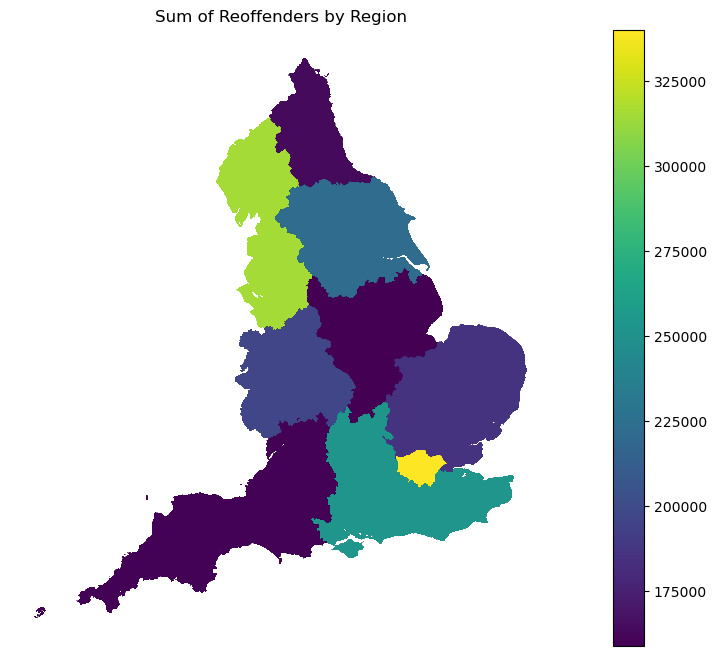

In [30]:
#creating a chloroleth plot for the sum of reoffenders
f, ax = plt.subplots(1, figsize=(16, 8))
crime_reg.plot(column='reoffenders_sum', legend=True, ax=ax)

#removing the axis
ax.set_axis_off()

#setting the title
ax.set_title("Sum of Reoffenders by Region")

plt.show()

The above choropleth map of England by the sum of reoffenders comes out as expected, with the amount of reoffenders following the trend of area population.

In [31]:
#making the reoffending rate a % 
crime_reg['reoffending_rate'] = (crime_reg['reoffenders_sum'] / crime_reg['offenders_sum']) * 100
crime_reg.head()

,region,offenders,reoffenders,cohort,subcat1,geo_label,geo_code,geometry,reoffenders_sum,offenders_sum,reoffending_rate
0,East Midlands,9105,3110,Apr 2008 to Mar 2009,18 to 20,East Midlands,E12000004,"MULTIPOLYGON (((454996.828 276726.552, 454974....",158728,543228,29.219407
1,East Midlands,9470,2953,Apr 2008 to Mar 2009,21 to 24,East Midlands,E12000004,"MULTIPOLYGON (((454996.828 276726.552, 454974....",158728,543228,29.219407
2,East Midlands,9011,2868,Apr 2008 to Mar 2009,25 to 29,East Midlands,E12000004,"MULTIPOLYGON (((454996.828 276726.552, 454974....",158728,543228,29.219407
3,East Midlands,6334,1965,Apr 2008 to Mar 2009,30 to 34,East Midlands,E12000004,"MULTIPOLYGON (((454996.828 276726.552, 454974....",158728,543228,29.219407
4,East Midlands,5574,1423,Apr 2008 to Mar 2009,35 to 39,East Midlands,E12000004,"MULTIPOLYGON (((454996.828 276726.552, 454974....",158728,543228,29.219407


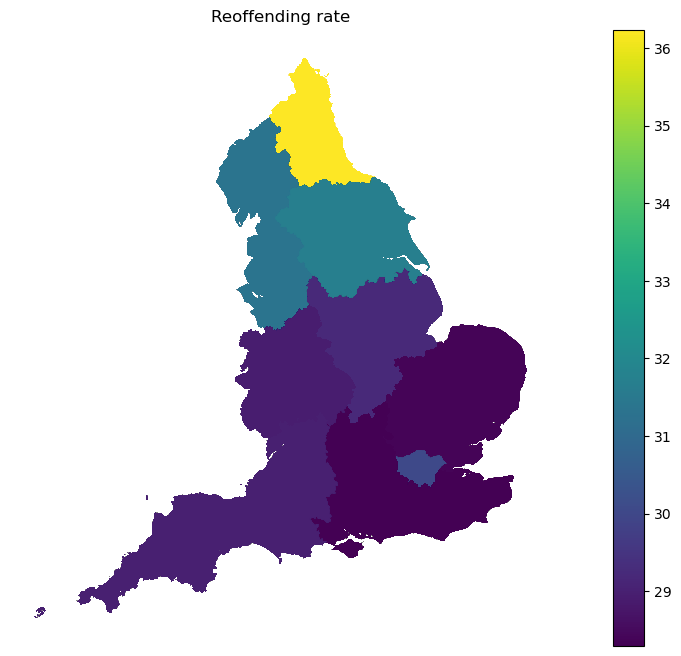

In [32]:
#creating a chloroleth plot of reoffending rate by region
f, ax = plt.subplots(1, figsize=(16, 8))
crime_reg.plot(column='reoffending_rate', legend=True, ax=ax)

#removing the axis
ax.set_axis_off()

#setting the title
ax.set_title("Reoffending rate")

plt.show()

The above choropleth map of the reoffending rate as a percentage is more telling; it is important to use proportions with choropleth maps to convey the data accurately (Cromley and Cromley, 2009). The North Eastern region has the highest reoffending rate, compared to the Southern regions who show lower reoffending rates.

In [33]:
#getting the centroid points of each polygon point in the geometry column of the deprivation dataset
dep['centroid'] = dep['dep_geom'].centroid

#checking it worked
dep.head()

,lsoa11cd,dep_geom,IMDScore,IMD_Decile,WorkPop,centroid
0,E01000001,"POLYGON ((532105.092 182011.230, 532162.491 18...",6.208,9,715.00,POINT (532150.879 181615.038)
1,E01000002,"POLYGON ((532746.813 181786.891, 532671.688 18...",5.143,10,619.75,POINT (532443.354 181645.862)
2,E01000003,"POLYGON ((532135.145 182198.119, 532158.250 18...",19.402,5,804.00,POINT (532207.062 182030.087)
3,E01000005,"POLYGON ((533807.946 180767.770, 533649.063 18...",28.652,3,683.00,POINT (533618.591 181157.119)
4,E01000006,"POLYGON ((545122.049 184314.931, 545271.917 18...",19.837,5,1284.50,POINT (544934.368 184297.551)


In order to merge the 'crime_reg' dataset with 'dep', so we're able to see what the average IMD score is for the regions we have in our other dataset (for ease of comparability with reoffending later on), we first need to find the centroids of the polygon points in 'dep'. This is because the geospatial data in 'crime_reg' and 'dep' are different. 'Dep' doesn't have the regional polygon points, it instead has smaller areas such as LSOAs. Therefore, by finding the centroids of each smaller area, we can see which points fit in which region in our other dataset. After we know this, we can find the average of the IMD scores in each region. We will do this by matching every IMD score to each centroid, then finding the mean of the IMD scores of all centroids in a given region.

To do this practically, the geometry points need to be put as a string column in 'dep', as when the datasets are merged without doing this, the geometry points are lost. It will later be changed back to a geometry column, after the merge is successful.

In [34]:
#importing packages
from shapely.wkt import loads

#making a copy of the geometry column
crime_reg['geom_copy'] = crime_reg.geometry

#converting the copy of the geom column to a string
crime_reg['geom_copy'] = crime_reg['geom_copy'].apply(lambda x: str(x))

#checking it worked
crime_reg.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1080 entries, 0 to 1079
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   region            1080 non-null   object  
 1   offenders         1080 non-null   int64   
 2   reoffenders       1080 non-null   int64   
 3   cohort            1080 non-null   object  
 4   subcat1           1080 non-null   object  
 5   geo_label         1080 non-null   object  
 6   geo_code          1080 non-null   object  
 7   geometry          1080 non-null   geometry
 8   reoffenders_sum   1080 non-null   int64   
 9   offenders_sum     1080 non-null   int64   
 10  reoffending_rate  1080 non-null   float64 
 11  geom_copy         1080 non-null   object  
dtypes: float64(1), geometry(1), int64(4), object(6)
memory usage: 109.7+ KB


In [35]:
#setting the geomtry column to be used in the intersect function
crime_reg = crime_reg.set_geometry('geometry')

#check the data type
crime_reg.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1080 entries, 0 to 1079
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   region            1080 non-null   object  
 1   offenders         1080 non-null   int64   
 2   reoffenders       1080 non-null   int64   
 3   cohort            1080 non-null   object  
 4   subcat1           1080 non-null   object  
 5   geo_label         1080 non-null   object  
 6   geo_code          1080 non-null   object  
 7   geometry          1080 non-null   geometry
 8   reoffenders_sum   1080 non-null   int64   
 9   offenders_sum     1080 non-null   int64   
 10  reoffending_rate  1080 non-null   float64 
 11  geom_copy         1080 non-null   object  
dtypes: float64(1), geometry(1), int64(4), object(6)
memory usage: 109.7+ KB


In [36]:
#setting the geometry column for the dep data
dep = dep.set_geometry('centroid')

#checking to see if it worked
dep.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 32844 entries, 0 to 32843
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   lsoa11cd    32844 non-null  object  
 1   dep_geom    32844 non-null  geometry
 2   IMDScore    32844 non-null  float64 
 3   IMD_Decile  32844 non-null  int64   
 4   WorkPop     32844 non-null  float64 
 5   centroid    32844 non-null  geometry
dtypes: float64(2), geometry(2), int64(1), object(1)
memory usage: 1.5+ MB


In [37]:
#joining dep and crime_reg by intersecting the geometries
crime_reg_dep = gpd.sjoin(dep, crime_reg, op='within')

In [38]:
#dropping all unwanted columns
crime_reg_dep = crime_reg_dep.drop(columns=['lsoa11cd', 'dep_geom', 'geo_code', 'geo_label'])

#checking it worked
crime_reg_dep.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 3939480 entries, 0 to 32609
Data columns (total 14 columns):
 #   Column            Dtype   
---  ------            -----   
 0   IMDScore          float64 
 1   IMD_Decile        int64   
 2   WorkPop           float64 
 3   centroid          geometry
 4   index_right       int64   
 5   region            object  
 6   offenders         int64   
 7   reoffenders       int64   
 8   cohort            object  
 9   subcat1           object  
 10  reoffenders_sum   int64   
 11  offenders_sum     int64   
 12  reoffending_rate  float64 
 13  geom_copy         object  
dtypes: float64(3), geometry(1), int64(6), object(4)
memory usage: 450.8+ MB


In [39]:
#finding the average IMD score for each region
average_imd_by_region = crime_reg_dep.groupby('region')['IMDScore'].mean().reset_index()
crime_reg_dep = pd.merge(crime_reg_dep, average_imd_by_region, on='region', how='left',
                         suffixes=('_original', '_average'))

In [40]:
#checking it added a new columns with the IMD average
crime_reg_dep.head()

,IMDScore_original,IMD_Decile,WorkPop,centroid,index_right,region,offenders,reoffenders,cohort,subcat1,reoffenders_sum,offenders_sum,reoffending_rate,geom_copy,IMDScore_average
0,6.208,9,715.00,POINT (532150.879 181615.038),240,London,15452,5460,Apr 2008 to Mar 2009,18 to 20,339952,1131708,30.038844,"MULTIPOLYGON (((534527.083 200056.467, 534528....",21.499268
1,5.143,10,619.75,POINT (532443.354 181645.862),240,London,15452,5460,Apr 2008 to Mar 2009,18 to 20,339952,1131708,30.038844,"MULTIPOLYGON (((534527.083 200056.467, 534528....",21.499268
2,19.402,5,804.00,POINT (532207.062 182030.087),240,London,15452,5460,Apr 2008 to Mar 2009,18 to 20,339952,1131708,30.038844,"MULTIPOLYGON (((534527.083 200056.467, 534528....",21.499268
3,28.652,3,683.00,POINT (533618.591 181157.119),240,London,15452,5460,Apr 2008 to Mar 2009,18 to 20,339952,1131708,30.038844,"MULTIPOLYGON (((534527.083 200056.467, 534528....",21.499268
4,19.837,5,1284.50,POINT (544934.368 184297.551),240,London,15452,5460,Apr 2008 to Mar 2009,18 to 20,339952,1131708,30.038844,"MULTIPOLYGON (((534527.083 200056.467, 534528....",21.499268


In [41]:
#dropping all unneccessary variables
crime_reg_dep = crime_reg_dep.drop(columns=['centroid', 'index_right'])

#checking it worked
crime_reg_dep.head()

,IMDScore_original,IMD_Decile,WorkPop,region,offenders,reoffenders,cohort,subcat1,reoffenders_sum,offenders_sum,reoffending_rate,geom_copy,IMDScore_average
0,6.208,9,715.00,London,15452,5460,Apr 2008 to Mar 2009,18 to 20,339952,1131708,30.038844,"MULTIPOLYGON (((534527.083 200056.467, 534528....",21.499268
1,5.143,10,619.75,London,15452,5460,Apr 2008 to Mar 2009,18 to 20,339952,1131708,30.038844,"MULTIPOLYGON (((534527.083 200056.467, 534528....",21.499268
2,19.402,5,804.00,London,15452,5460,Apr 2008 to Mar 2009,18 to 20,339952,1131708,30.038844,"MULTIPOLYGON (((534527.083 200056.467, 534528....",21.499268
3,28.652,3,683.00,London,15452,5460,Apr 2008 to Mar 2009,18 to 20,339952,1131708,30.038844,"MULTIPOLYGON (((534527.083 200056.467, 534528....",21.499268
4,19.837,5,1284.50,London,15452,5460,Apr 2008 to Mar 2009,18 to 20,339952,1131708,30.038844,"MULTIPOLYGON (((534527.083 200056.467, 534528....",21.499268


In [42]:
crime_reg_dep.tail()

,IMDScore_original,IMD_Decile,WorkPop,region,offenders,reoffenders,cohort,subcat1,reoffenders_sum,offenders_sum,reoffending_rate,geom_copy,IMDScore_average
3939475,11.089,8,1352.75,South East,2019,654,Apr 2019 to Mar 2020,15 to 17,253254,895094,28.293565,"MULTIPOLYGON (((579294 178914.598, 579294 1789...",15.463425
3939476,7.629,9,1167.50,South East,2019,654,Apr 2019 to Mar 2020,15 to 17,253254,895094,28.293565,"MULTIPOLYGON (((579294 178914.598, 579294 1789...",15.463425
3939477,18.486,5,1265.50,South East,2019,654,Apr 2019 to Mar 2020,15 to 17,253254,895094,28.293565,"MULTIPOLYGON (((579294 178914.598, 579294 1789...",15.463425
3939478,12.932,7,979.00,South East,2019,654,Apr 2019 to Mar 2020,15 to 17,253254,895094,28.293565,"MULTIPOLYGON (((579294 178914.598, 579294 1789...",15.463425
3939479,16.098,6,1023.75,South East,2019,654,Apr 2019 to Mar 2020,15 to 17,253254,895094,28.293565,"MULTIPOLYGON (((579294 178914.598, 579294 1789...",15.463425


## Regression Modelling

Note: the regression modelling is done before the data visualisation of IMD, as the dataset needs to be clipped in order for the actions to run.

In [43]:
#regression model of reoffending by IMD score, with controls
model = smf.glm(formula = "reoffenders ~ IMDScore_original + WorkPop",\
                #specify data source
                data=crime_reg_dep,\
                # specify poisson transformation
                family=sm.families.Poisson()).fit()

#printing the summary statistics of the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            reoffenders   No. Observations:              3939480
Model:                            GLM   Df Residuals:                  3939477
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.6446e+09
Date:                Thu, 14 Dec 2023   Deviance:                   3.2530e+09
Time:                        15:31:44   Pearson chi2:                 3.46e+09
No. Iterations:                    32   Pseudo R-squ. (CS):             0.9677
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             7.4467   3.85e-05   1.94e+05      0.000       7.447       7.447
IMDScore_original     0.0010   7.37e-07   1304.134      0.000       0.001       0.001
WorkPop               0.0001   3.45e-08   3445.507      0.000       0.000       0.000
=====================================================================================
"""

A regression analysis was conducted to investigate the relationship between the Index of Multiple Deprivation (IMD) scores and reoffenders across various demographic categories. The analysis utilised aggregate data, with the dependent variable being the count of reoffenders.

The Poisson Generalised Linear Model (GLM) was selected as the model type, due to the dependent variable in this analysis being the count of reoffenders. The Poisson distribution is appropriate for modelling count data, which represents the number of events occurring within a fixed interval or region. It also uses a log-link function, which is particularly suitable for modelling rates or counts.

The primary independent variable, the average regional IMD score, exhibited a coefficient of 0.0010, accompanied by a highly significant p-value (p < 0.001). This suggests that an increase in IMD scores is associated with a proportional increase in the count of reoffenders.

Additionally, the working population of each region, represented by the WorkPop variable, demonstrated a coefficient of 0.0001 with a significant p-value (p < 0.001), indicating its noteworthy impact on the count of reoffenders.

The Pseudo R-squared value of 0.9677 indicates that the model explains a substantial proportion of the deviance in the dependent variable (reoffenders), emphasising its explanatory power. The deviance and Pearson chi-squared statistics are large, indicating some lack of fit, but this might be due to the large sample size.

In summary, the regression model suggests a positive and statistically significant relationship between IMD scores and the count of reoffenders. This implies that regions with higher levels of deprivation tend to exhibit a higher count of reoffenders.

However, caution is advised in interpreting these results due to the aggregated nature of the data. The aggregation restricts the ability to draw individual-level inferences, and the omission of potentially relevant predictors not available in the dataset may influence the outcomes. Therefore, it is crucial to interpret these findings in conjunction with existing literature, which aligns with the interpretation that deprivation is a risk factor for crime and persistent offending (Rhudy and Schuerman, 2009; Hay and Forrest, 2009).

## Data visualisation (IMD)

In [44]:
#simplying the dataset
crime_reg_dep = crime_reg_dep[['geom_copy', 'IMDScore_average', 'region', 'reoffending_rate']]

In [45]:
#dropping all the duplicates by region
crime_reg_dep = crime_reg_dep.drop_duplicates(subset='region')

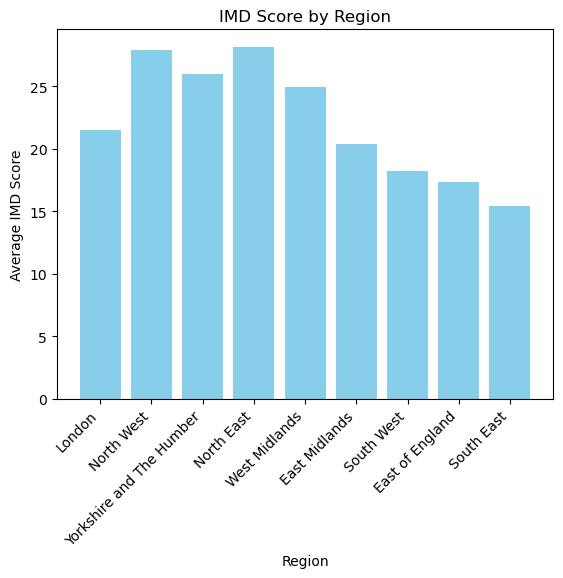

In [46]:
#bar chart of IMD score by region
region = crime_reg_dep['region']
IMD = crime_reg_dep['IMDScore_average']

plt.bar(region, IMD, color='skyblue')
plt.xlabel('Region')
plt.ylabel('Average IMD Score')
plt.title('IMD Score by Region')
plt.xticks(rotation=45, ha='right') 
plt.show()

## Chloropleth maps for IMD

In [47]:
#exploring the dataset
crime_reg_dep.head()

,geom_copy,IMDScore_average,region,reoffending_rate
0,"MULTIPOLYGON (((534527.083 200056.467, 534528....",21.499268,London,30.038844
580080,"MULTIPOLYGON (((380424.183 522381.43200000003,...",27.908685,North West,31.346353
1119600,"MULTIPOLYGON (((509613.594 427973.654, 509625....",25.995664,Yorkshire and The Humber,31.677542
1517640,"MULTIPOLYGON (((448471.685 525830.808, 448471....",28.151056,North East,36.232164
1716120,"POLYGON ((431443.073 299111.23, 431449.304 299...",24.953028,West Midlands,28.939709


In [48]:
#exploring the dataset
crime_reg_dep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 0 to 3294120
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   geom_copy         9 non-null      object 
 1   IMDScore_average  9 non-null      float64
 2   region            9 non-null      object 
 3   reoffending_rate  9 non-null      float64
dtypes: float64(2), object(2)
memory usage: 360.0+ bytes


In [49]:
#converting geom_copy to a geometry type
crime_reg_dep['geom_copy'] = gpd.GeoSeries.from_wkt(crime_reg_dep['geom_copy'])

crime_reg_dep = gpd.GeoDataFrame(crime_reg_dep, geometry='geom_copy')

#checking it worked
crime_reg_dep.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 9 entries, 0 to 3294120
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geom_copy         9 non-null      geometry
 1   IMDScore_average  9 non-null      float64 
 2   region            9 non-null      object  
 3   reoffending_rate  9 non-null      float64 
dtypes: float64(2), geometry(1), object(1)
memory usage: 360.0+ bytes


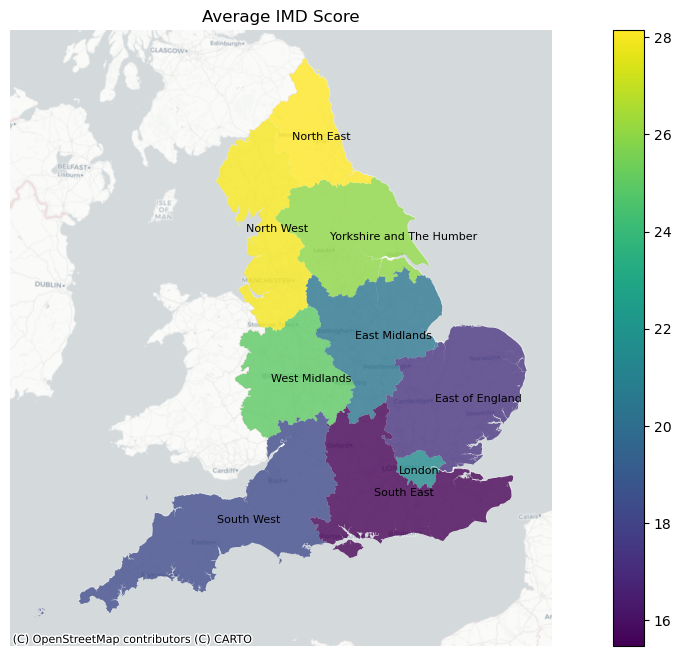

In [50]:
#creating a chloropleth plot of IMD score by region
f, ax = plt.subplots(1, figsize=(16, 8))
crime_reg_dep.plot(column='IMDScore_average', legend=True, ax=ax, alpha=0.8)

ctx.add_basemap(ax, crs='EPSG:27700', source=ctx.providers.CartoDB.Positron)

#removing the axis
ax.set_axis_off()

#setting the title
ax.set_title("Average IMD Score")

for idx, row in crime_reg_dep.iterrows():
    centroid = row['geom_copy'].centroid
    ax.annotate(row['region'], xy=(centroid.x, centroid.y), xytext=(-15, -4),
                textcoords='offset points', color='black', fontsize=8)
    
#arrowprops=dict(arrowstyle='-', color='red')

plt.show()

## Final data visualistions

In [51]:
#simplying the dataset
crime_reg = crime_reg[['geometry', 'reoffending_rate', 'region']]
#dropping all the duplicates by region
crime_reg = crime_reg.drop_duplicates(subset='region')

crime_reg.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 9 entries, 0 to 960
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geometry          9 non-null      geometry
 1   reoffending_rate  9 non-null      float64 
 2   region            9 non-null      object  
dtypes: float64(1), geometry(1), object(1)
memory usage: 288.0+ bytes


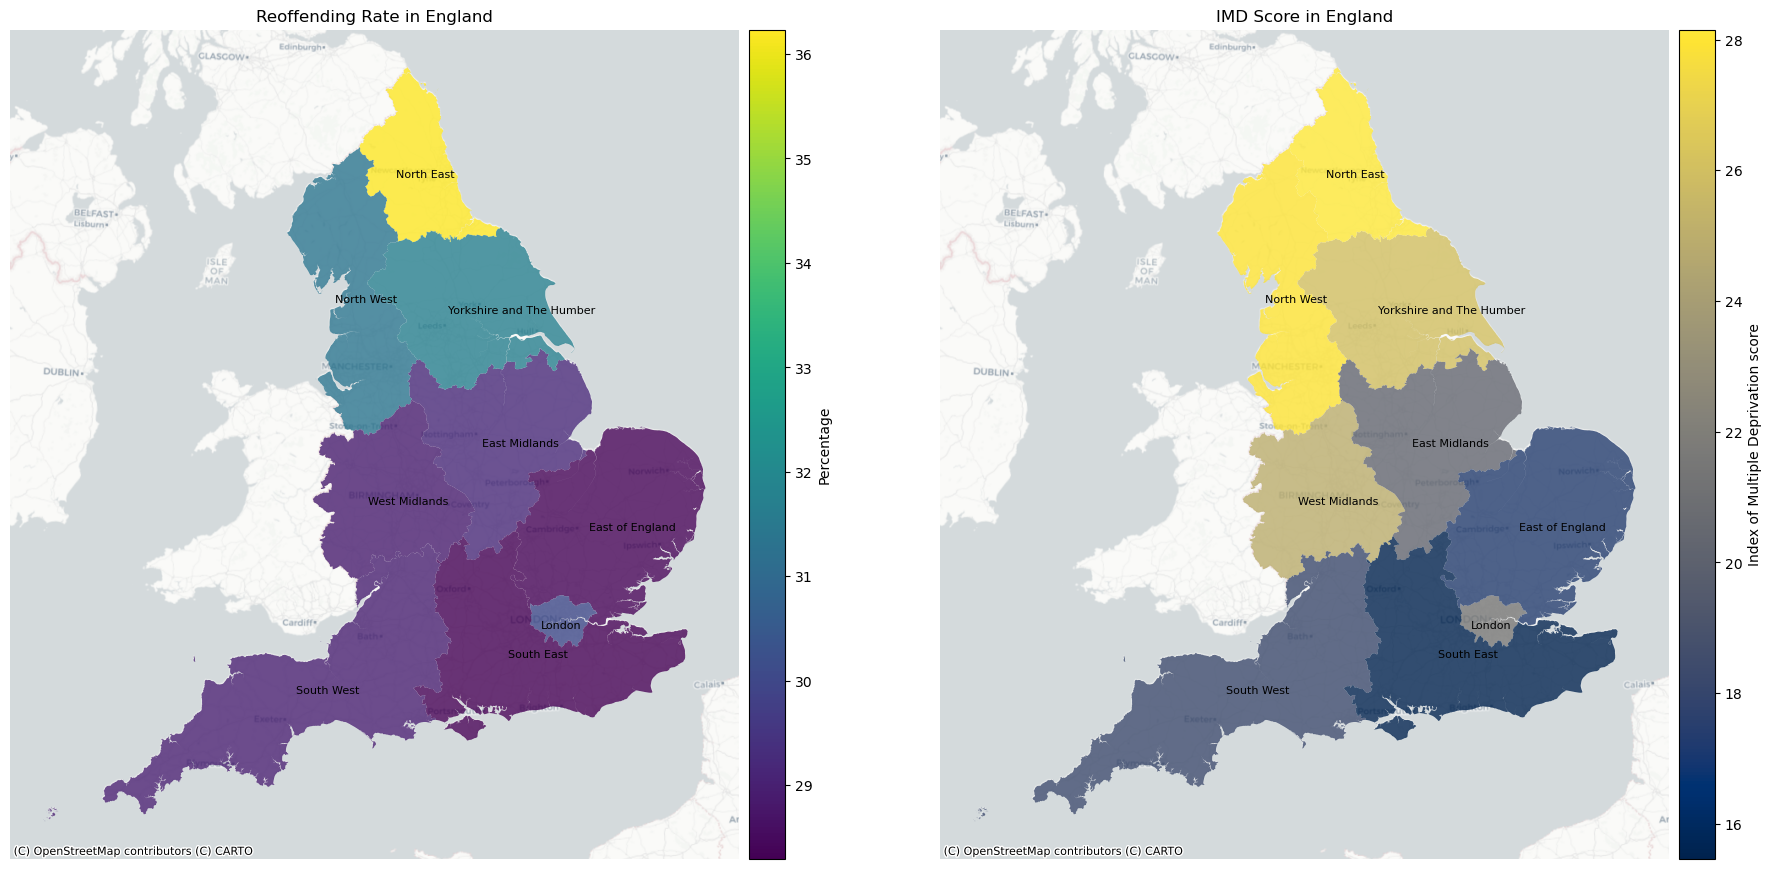

In [52]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

#creating the subplots
f, ax = plt.subplots(1, 2, figsize=(22, 11))

#plotting the first chloropleth map
crime_reg.plot(ax=ax[0], column='reoffending_rate', legend=False, cmap='viridis', alpha=0.8)

#adding the first basemap
ctx.add_basemap(ax[0], crs='EPSG:27700', source=ctx.providers.CartoDB.Positron)
ax[0].set_title("Reoffending Rate in England")
ax[0].set_axis_off()

#plotting the second chloropleth map
crime_reg_dep.plot(column='IMDScore_average', legend=False, cmap='cividis', ax=ax[1], alpha=0.8)

#adding the second basemap
ctx.add_basemap(ax[1], crs='EPSG:27700', source=ctx.providers.CartoDB.Positron)
ax[1].set_title("IMD Score in England")
ax[1].set_axis_off()

#creating a common divider for both subplots
divider0 = make_axes_locatable(ax[0])
divider1 = make_axes_locatable(ax[1])

#creating the first colourbar
sm0 = plt.cm.ScalarMappable(cmap='viridis',
                            norm=plt.Normalize(vmin=crime_reg['reoffending_rate'].min(),
                                               vmax=crime_reg['reoffending_rate'].max()))
sm0._A = []
cbar0 = plt.colorbar(sm0, cax=divider0.append_axes("right", size="5%", pad=0.1))
cbar0.set_label('Percentage')

#creating the second colourbar
sm1 = plt.cm.ScalarMappable(cmap='cividis',
                            norm=plt.Normalize(vmin=crime_reg_dep['IMDScore_average'].min(),
                                               vmax=crime_reg_dep['IMDScore_average'].max()))
sm1._A = []
cbar1 = plt.colorbar(sm1, cax=divider1.append_axes("right", size="5%", pad=0.1))
cbar1.set_label('Index of Multiple Deprivation score')

#annotating the maps with region names
for idx, row in crime_reg.iterrows():
    centroid = row['geometry'].centroid
    ax[0].annotate(row['region'], xy=(centroid.x, centroid.y), xytext=(-15, -6),
                   textcoords='offset points', color='black', fontsize=8)

for idx, row in crime_reg_dep.iterrows():
    centroid = row['geom_copy'].centroid
    ax[1].annotate(row['region'], xy=(centroid.x, centroid.y), xytext=(-15, -6),
                   textcoords='offset points', color='black', fontsize=8)

plt.show()

For the final spatial data visualisation, two choropleth maps are shown next to each other for ease of interpretation. They are organised in a 1x2 grid for side-by-side comparison, facilitating a quick visual assessment of the relationship between reoffending rates and IMD scores. On the left, the map of England shows the reoffending rate by region. On the right, the average IMD score is shown. In terms of aesthetic choices, viridis (left) and cividis (right) were chosen as colour palettes as they are both colour-blind friendly and are easily interpreted. Different colour maps were chosen for each map as the measures for each are different, the differentiation ensures the maps are interpreted correctly. The opacity was set to 0.8 in order for the basemap below to be seen, as well as the integrity of the variation in data being able to remain. The basemap (OpenStreetMap©) provides a neutral background, enhancing the visibility of the reoffending rate and IMD data, whilst adding the necessary context. The colour bars both have labels, showing the units of measurement. The region names are strategically placed at the centroids of each region to provide spatial context. The font size and colour were chosen for legibility against the map background.

The target audience for these visualisations is the public and policy-makers, therefore it is important that the maps correctly convey the information suitably for a non-technical audience. This is achieved by having the selected features creating informative and visually appealing maps that enable the audience to grasp the spatial patterns of reoffending rates and IMD scores. The colour choices prioritise accessibility and interpretability, while additional elements such as colour bars and annotations enhance the overall communicative power of the visualisations.

With regard to the interpretation of the choropleth maps, it shows that the Northern regions have higher average IMD scores, as well as a higher reoffending rate. Looking at the Southern regions (excluding London), they have lower average IMD scores, and also lower reoffending rates. 

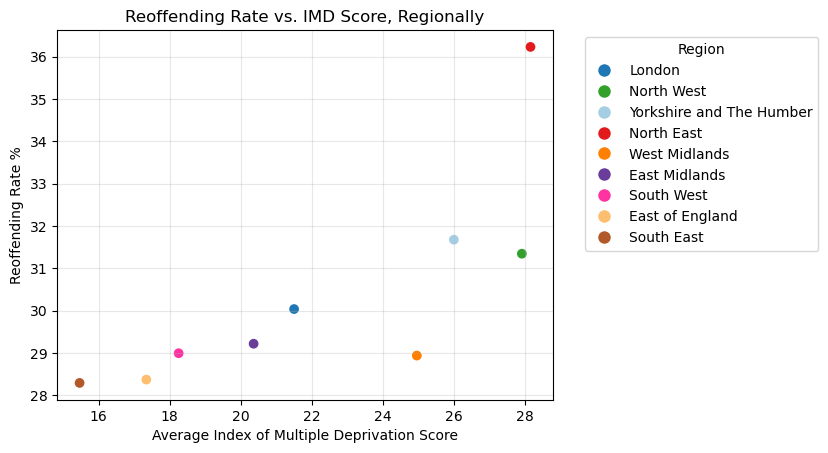

In [53]:
#creating a colour map for each region
region_colours = {'London': '#1f78b4',       # blue
                  'North West': '#33a02c',    # green
                  'Yorkshire and The Humber': '#a6cee3',  # light blue
                  'North East': '#e31a1c',    # red
                  'West Midlands': '#ff7f00', # orange
                  'East Midlands': '#6a3d9a', # purple
                  'South West': '#ff33a2',    # pink
                  'East of England': '#fdbf6f',  # light orange
                  'South East': '#b15928'}   # brown

#mapping the region names to colours
colours = crime_reg_dep['region'].map(region_colours)

#scatter plot
scatter = plt.scatter(crime_reg_dep['IMDScore_average'], crime_reg_dep['reoffending_rate'], c=colours)

plt.xlabel('Average Index of Multiple Deprivation Score')
plt.ylabel('Reoffending Rate %')
plt.title('Reoffending Rate vs. IMD Score, Regionally')

#creating a legend for the regions
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=region)
                 for region, color in region_colours.items()]

#moving the legend to outside the plot
plt.legend(handles=legend_labels, title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True, alpha=0.3)

plt.show()

For the final non-spatial visualisation, a scatter plot was utilised to show the reoffending rate by average IMD score. This type of plot was chosen as it clearly shows the correlation between the two variables, as well as distinguishing possible outliers, allowing the reader to easily interpret the information conveyed by the data (Moore et al., 2013). Colours were assigned to each region using a predefined colour map ‘region_colours’. Each region is represented by a distinct colour, aiding in the identification of data points. The colours were carefully chosen to be visually distinguishable and accessible, considering colorblindness. The x and y axis are clearly labelled to show the units of measurement. In addition to this, there is a legend which shows a key for the different regions and their respective colours. The circular marker labels enhance the visual connection between the legend and the data points. A grid was also added to the plot with low opacity, this ensures effective readability and aids in estimating values from the plot.

Again, this visualisation is suitable for any audience - particularly for those who have a limited statistical background, as the information conveyed by the plot is clear and easily interpreted.

In reference to the statistical interpretation of the scatterplot, it largely shows us that as the IMD score increases, so does the reoffending rate. The North East had both the highest IMD score, as well as the highest reoffending rate. The South East has the lowest IMD score and lowest reoffending rate. There is a clear outlier, the West Midlands, which has a higher IMD score but a lower reoffending rate.

## References

Cromley, R. G. and Cromley, E. K. (2009). Choropleth map legend design for visualizing community health disparities. International journal of health geographics. 8, pp .1-11.

Department for Levelling Up, Housing and Communities. (2020). English IMD 2019. [Online]. [Accessed 10 November 2023]. Available from: https://data.cdrc.ac.uk/ 

Hay, C. and Forrest, W. (2009). The implications of family poverty for a pattern of persistent offending. In: Savage, E. ed. The development of persistent criminality. Oxford: Oxford University Press, pp.54-70.

Ministry of Justice. (2022). Proven Reoffending Overview data tool, April 2019 to March 2020. National Statistics. [Online]. [Accessed 10 November 2023]. Available from: https://www.gov.uk/

Moore, D. S., Notz, W. I, and Flinger, M. A. (2013). The basic practice of statistics (6th
ed.). New York, NY: W. H. Freeman and Company.

Office for National Statistics. (2020). 2011 Census Geography boundaries (Regions). [Online]. [Accessed 20 November 2023]. Available from: https://statistics.ukdataservice.ac.uk/ 

Office for Statistics Regulation. (2021). Misleadingness: Paper 2. London: Misleadingness: Office for Statistics Regulation. Available from: https://osr.statisticsauthority.gov.uk/wp-content/uploads/2021/04/Misleadingness-Paper-2.pdf 

Rhudy, K. and Schuerman, J. (2009). Breaking the cycle of offending and poverty: A symposium on the intersection of juvenile justice and poverty. Georgetown Journal on Poverty Law & Policy. 16, pp. 461-470.